In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:

!kaggle competitions download -c airbus-ship-detection

100% 28.6G/28.6G [05:20<00:00, 137MB/s]
100% 28.6G/28.6G [05:20<00:00, 95.6MB/s]


In [ ]:
!unzip -q airbus-ship-detection -d airbus-ship-detection

00e5fb033.jpg


1/1 [==============================] - 1s 1s/step
0da346d32.jpg
1/1 [==============================] - 0s 105ms/step
0b7359c38.jpg
1/1 [==============================] - 0s 102ms/step
0efa4a040.jpg
1/1 [==============================] - 0s 99ms/step
1b5fd69bc.jpg
1/1 [==============================] - 0s 100ms/step


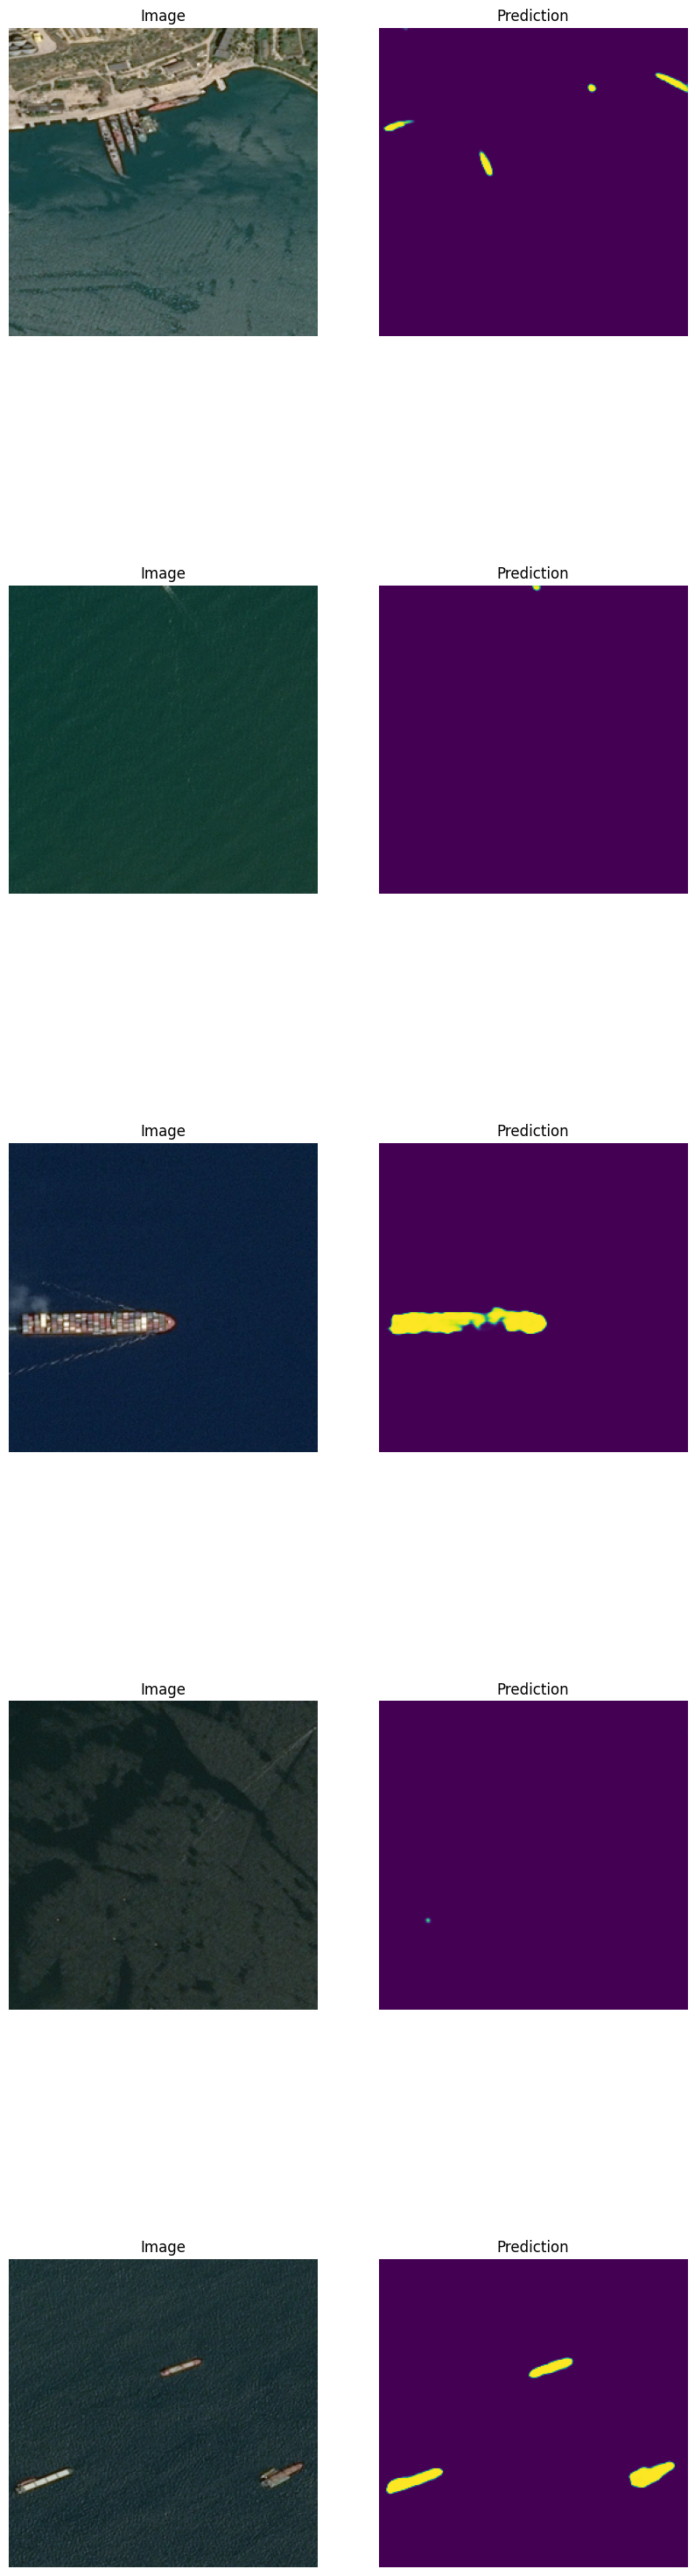

In [ ]:
from skimage.io import imread
import tensorflow as tf
import cv2
from tensorflow import keras
from matplotlib import pyplot as plt
import os
import numpy as np
from skimage.io import imread
from keras.losses import binary_crossentropy
import keras.backend as K
from PIL import Image

TEST_DIR = 'airbus-ship-detection/test_v2/'

def dice_coeff(target, pred):
  # target__==target
  smooth = 1.0
  intersection = K.sum(target * pred, axis=[1,2,3])
  union = K.sum(target, axis=[1,2,3]) + K.sum(pred, axis=[1,2,3])
  return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)
  # return ((2*((pred*target).sum()))+smooth) / (pred.sum()+target.sum()+smooth)


def loss(target, pred):
  bce = binary_crossentropy(target, pred)
  dice_loss = 1-dice_coeff(target, pred)
  return bce-tf.math.log(1-dice_loss)


unet_model = keras.models.load_model('unet_model.h5',custom_objects={'loss': loss})


fig, m_axs = plt.subplots(5, 2, figsize = (10, 40))
img_name=['00e5fb033.jpg','0da346d32.jpg','0b7359c38.jpg','0efa4a040.jpg','1b5fd69bc.jpg']

for i, (ax1, ax2), c_img_name in enumerate(m_axs.flatten(), img_name):
    c_path = os.path.join(TEST_DIR, c_img_name)
    c_img = imread(c_path)
    c_img = Image.fromarray(c_img).resize((256, 256))
    first_img = np.expand_dims(np.array(c_img) / 255.0, 0)
    first_seg = unet_model.predict(first_img)

    ax1.imshow(c_img)
    ax1.set_title('Image')
    ax2.imshow(first_seg[0, :, :, 0], vmin=0, vmax=1)
    ax2.set_title('Prediction')

    ax1.axis('off')
    ax2.axis('off')

plt.tight_layout()
plt.show()
